### Exercise #4 - correction

In [24]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
from statsmodels.graphics.gofplots import qqplot

df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

#### Exercise 4.1

Take 1000 random samples with replacement of increasing sample sizes (e.g. 10, 50, 100, 150, 200, 250, 300, 500 and 1000 observations), compute the mean Temp_ann of each sample and use an appropriate visualization to show how many samples will we need to have a good estimate of the population mean (this is a corrected version of the last challenge of the previous exercise).


[[15.45, 13.649999999999999, 12.3, 14.4, 14.15, 15.649999999999999, 13.6, 16.2, 10.95, 14.2, 14.399999999999999, 14.8, 14.9, 15.100000000000001, 12.25, 14.45, 12.75, 13.95, 12.25, 14.05, 13.7, 13.649999999999999, 14.25, 13.05, 15.35, 10.9, 12.95, 11.75, 13.600000000000001, 9.3, 10.95, 16.2, 12.05, 9.5, 11.55, 12.399999999999999, 12.05, 14.85, 14.75, 13.55, 13.5, 12.85, 16.5, 13.3, 13.4, 12.6, 14.3, 12.0, 11.65, 15.65, 8.6, 11.15, 8.6, 12.75, 12.65, 15.2, 14.2, 11.85, 12.9, 13.8, 12.3, 13.2, 14.6, 12.1, 12.100000000000001, 12.0, 14.0, 14.2, 12.8, 13.65, 11.75, 12.75, 11.45, 12.95, 13.35, 11.55, 12.95, 15.15, 14.4, 14.25, 12.8, 14.399999999999999, 15.0, 10.100000000000001, 12.6, 14.25, 14.350000000000001, 12.65, 11.7, 13.3, 13.3, 13.6, 14.2, 13.3, 11.2, 14.350000000000001, 13.8, 12.149999999999999, 13.5, 15.5, 16.200000000000003, 11.05, 16.25, 11.25, 17.0, 11.5, 13.6, 14.7, 14.0, 12.2, 12.85, 13.95, 15.75, 14.4, 14.0, nan, 14.7, 15.549999999999999, 13.549999999999999, 14.2, 13.8999999999

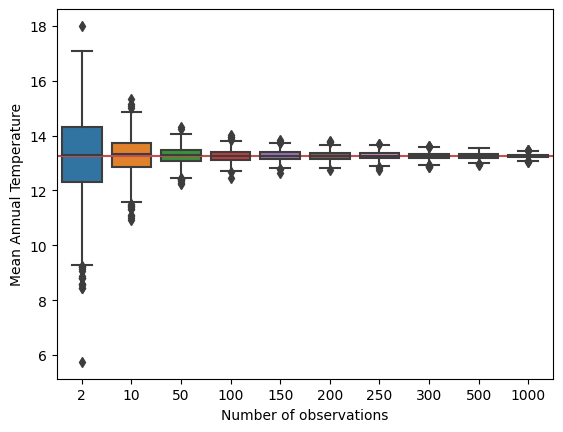

In [52]:
import random

num = [2, 10, 50, 100, 150, 200, 250, 300, 500, 1000] 

temp = df['temp_ann']
means = []

for i in num:
    # Generating seed so that we can get same result every time the loop is run...
    np.random.seed(1)
    # a loop that takes a random sample with i observations from temp and computes the mean, ...
    # ... and repeat the process 1000 times
    x = [np.mean( # compute mean
        temp.take( # from temp ...
        np.random.randint(0, len(temp), i)) # ... take a random sample of i observations ...
        ) for _ in range(1000)] # ... 1000 times.
    means.append(x)

print(means) # means is a list of 9 lists with 1000 observations (means) each.
type(means)

# Produce boxplots
ax = sns.boxplot(data= means)
ax.set_xticklabels(num) # change x-axis tick labels
ax.set_xlabel('Number of observations')
ax.set_ylabel('Mean Annual Temperature') 
plt.axhline(y=np.mean(df['temp_ann']), color='r', linestyle='-') # plot line of mean Temp_ann using all data

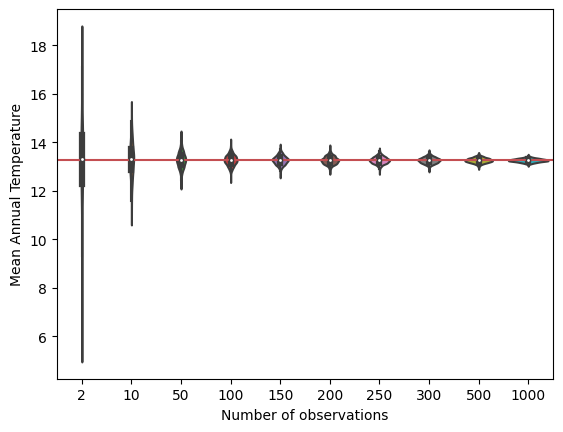

In [53]:
ax = sns.violinplot(data= means)
ax.set_xticklabels(num) # change x-axis tick labels
ax.set_xlabel('Number of observations')
ax.set_ylabel('Mean Annual Temperature') 
plt.axhline(y=np.mean(df['temp_ann']), color='r', linestyle='-') # plot line of mean Temp_ann using all data

In [54]:
# convert means to a DataFrame

meansdf = pd.DataFrame(means).transpose()
meansdf.columns = num
meanstack = pd.DataFrame(meansdf.stack(), columns=['Mean_Temp_ann'])
meanstack.reset_index(inplace=True)
meanstack = meanstack.rename(columns = {'level_1':'N_obs'})
meanstack = meanstack.drop('level_0', axis=1)
meanstack['N_obs'] = meanstack['N_obs'].astype(str) # change integer to string
meanstack

,N_obs,Mean_Temp_ann
0,2,15.450000
1,10,13.990000
2,50,13.932653
3,100,13.442857
4,150,13.191724
...,...,...
9994,200,13.250262
9995,250,13.448347
9996,300,13.336486
9997,500,13.222222


In [55]:
meanstack.dtypes

N_obs             object
Mean_Temp_ann    float64
dtype: object

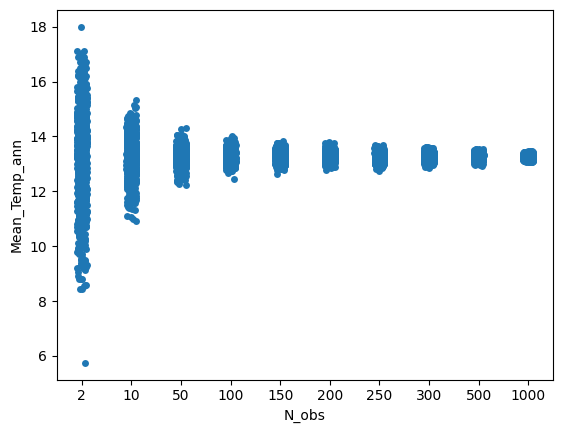

In [56]:
ax = sns.stripplot(data= meanstack, x='N_obs', y='Mean_Temp_ann')

[[14.61111111111111, 13.059999999999999, 13.66, 12.63, 14.25, 13.77, 14.320000000000002, 13.26, 12.830000000000002, 12.966666666666667, 13.440000000000001, 13.429999999999998, 13.411111111111113, 14.319999999999999, 14.549999999999997, 13.540000000000001, 12.52, 13.170000000000002, 14.319999999999999, 13.49, 12.830000000000002, 12.209999999999999, 13.122222222222222, 13.110000000000003, 12.76, 13.01, 13.566666666666666, 13.440000000000001, 13.13, 12.97777777777778, 12.830000000000002, 13.400000000000002, 12.700000000000001, 13.533333333333331, 12.209999999999999, 14.11, 14.62, 12.211111111111112, 13.355555555555556, 14.02, 13.110000000000003, 13.76, 14.290000000000001, 14.0, 13.330000000000002, 13.170000000000002, 12.270000000000001, 11.969999999999999, 12.65, 14.0625, 13.74, 14.24, 13.319999999999999, 14.11, 14.64, 13.577777777777778, 12.222222222222221, 13.35, 14.866666666666667, 14.64, 12.41, 14.219999999999999, 13.88, 13.87, 13.3125, 12.61111111111111, 12.86, 13.959999999999999, 13

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '0'),
  Text(1, 0, '50'),
  Text(2, 0, '100'),
  Text(3, 0, '150'),
  Text(4, 0, '200'),
  Text(5, 0, '250'),
  Text(6, 0, '300'),
  Text(7, 0, '350'),
  Text(8, 0, '400'),
  Text(9, 0, '450'),
  Text(10, 0, '500'),
  Text(11, 0, '550'),
  Text(12, 0, '600'),
  Text(13, 0, '650'),
  Text(14, 0, '700'),
  Text(15, 0, '750'),
  Text(16, 0, '800'),
  Text(17, 0, '850'),
  Text(18, 0, '900'),
  Text(19, 0, '950'),
  Text(20, 0, '1000')])

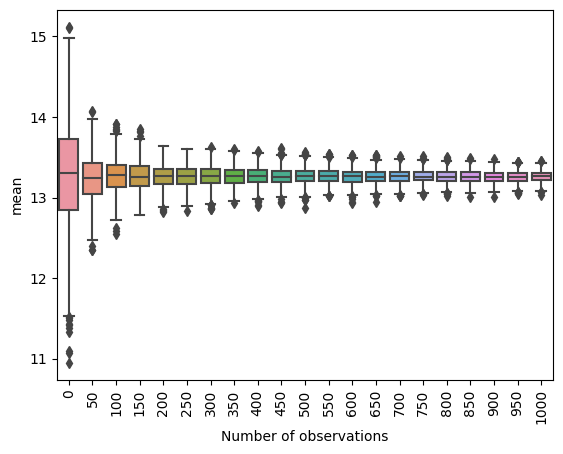

In [63]:
temp = df['temp_ann']
means = []

for i in range(10, 1050, 50):
    # Generating seed so that we can get same result
    # every time the loop is run...
    x = [np.mean(
        temp.take(
        np.random.randint(0, len(temp), i))
        ) for _ in range(1000)]
    means.append(x)

print(means) # means is a list of lists
type(means)

# Produce boxplots
plt.xticks(rotation=90)
ax = sns.boxplot(data= means)
ax.set_xticklabels(range(0, 1050, 50))
ax.set_xlabel('Number of observations')
ax.set_ylabel('mean')
plt.xticks(rotation=90)


#### Exercise 4.2

Using an appropriate visualization, check the effect of Mean Annual Temperature (Temp_ann) on the presence of Salmo trutta fario (Brown Trout).

Import and clean data

In [8]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [9]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [64]:
df2 = df.dropna()

Some possible visualization settings

In [65]:
# Resize figure
# sns.set(rc={'figure.figsize':(8,3)}) # will change the setting for the whole graphs when applied

# Alternative
# from matplotlib import rcParams
# figure size in inches
# rcParams['figure.figsize'] = 8,3

# To restore settings run:
# import matplotlib as mpl
# mpl.rc_file_defaults()

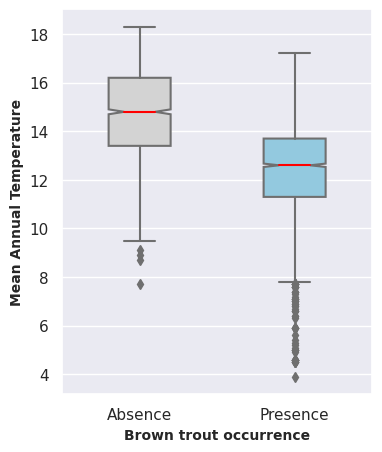

In [70]:
# Resize figure
sns.set(rc={'figure.figsize':(4,5)}) 

sns.boxplot(data=df, x='Salmo trutta fario', y='temp_ann',
        notch=True,
        palette=['lightgray', 'skyblue'],
        width=0.4,
        medianprops=dict(color="red"),
        ).set_xticklabels(['Absence', 'Presence'])
plt.xlabel('Brown trout occurrence', fontdict={'size': 10, 'weight': 'bold'})
plt.ylabel('Mean Annual Temperature', fontdict={'size': 10, 'weight': 'bold'})

# restore settings
import matplotlib as mpl
mpl.rc_file_defaults()

Text(0.5, 0, 'Mean Annual Temperature')

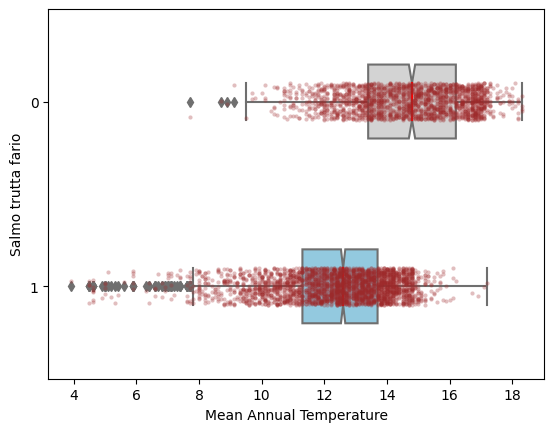

In [71]:
sns.boxplot(data=df, y='Salmo trutta fario', x='temp_ann', orient='h',
        notch=True,
        palette=['lightgray', 'skyblue'],
        width=0.4,
        medianprops=dict(color="red"),
        )

sns.stripplot(data=df, y='Salmo trutta fario', x='temp_ann', orient='h',
    jitter=0.1, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    color='#9e2a2b', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    alpha=.3,
    s=3, # point size
    )
plt.xlabel('Mean Annual Temperature')

Text(0.5, 0, 'Mean Annual Temperature')

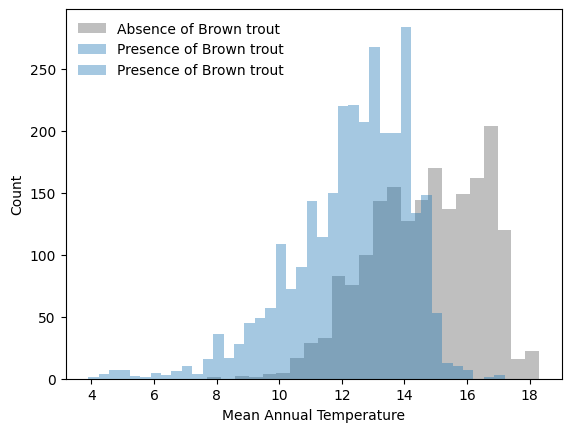

In [72]:
sns.histplot(data=df[df['Salmo trutta fario']==0], x='temp_ann', color='gray', alpha=0.5, edgecolor=None, label="Absence of Brown trout")
sns.histplot(data=df[df['Salmo trutta fario']==1], x='temp_ann', alpha=0.4, edgecolor=None, label="Presence of Brown trout")
plt.legend(frameon=False)
plt.xlabel('Mean Annual Temperature')


Text(0.5, 0, 'Mean Annual Temperature')

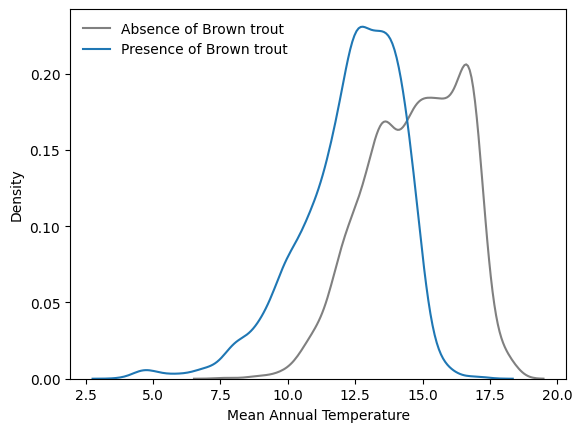

In [74]:
sns.kdeplot(data=df[df['Salmo trutta fario']==0], x='temp_ann', color='gray', fill=False, label="Absence of Brown trout")
sns.kdeplot(data=df[df['Salmo trutta fario']==1], x='temp_ann', fill=False, label="Presence of Brown trout")
plt.legend(frameon=False, loc='upper left')
plt.xlabel('Mean Annual Temperature')

(0.0, 25.0)

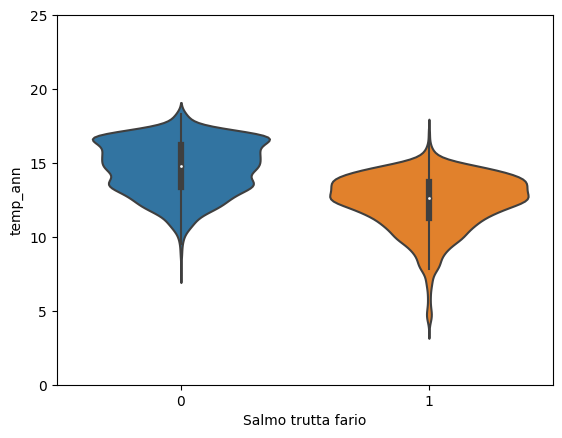

In [78]:
sns.violinplot(data=df, x='Salmo trutta fario', y='temp_ann')
plt.ylim(0, 25)

(0.0, 20.0)

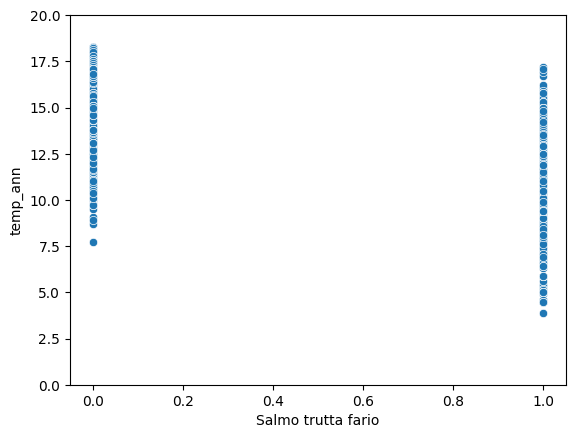

In [79]:
sns.scatterplot(data=df, x='Salmo trutta fario', y='temp_ann')
plt.ylim(0, 20)

<AxesSubplot: xlabel='Actual_river_slope', ylabel='Count'>

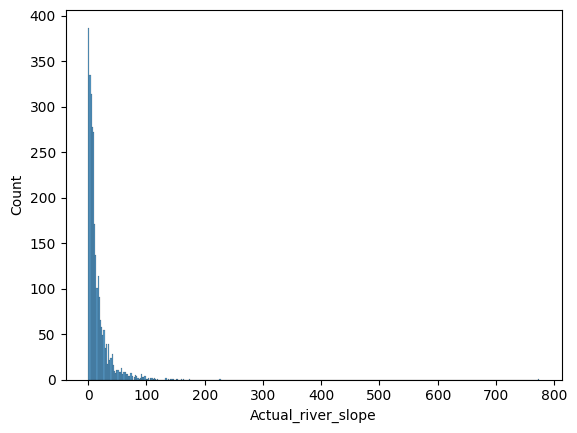

In [83]:
sns.histplot(df2['Actual_river_slope'])



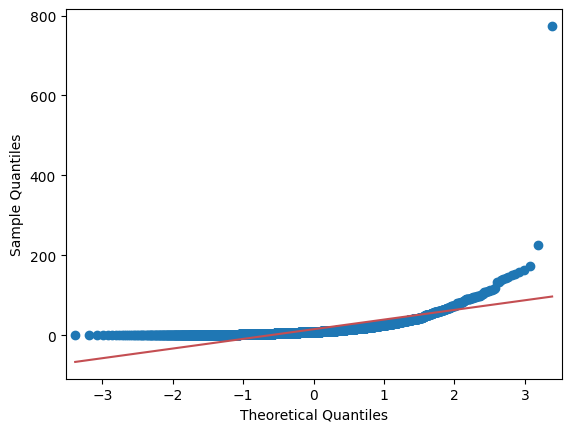

In [93]:
from statsmodels.graphics.gofplots import qqplot


qqplot(pd.Series(df2['Actual_river_slope']), line='s')
plt.show()

#### Exercise 4.3
Test, using both visualization and hypothesis testing methods, if the actual_river_slope is drawn from a normal distribution.

In [94]:
# import function
from scipy.stats import shapiro

df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()

# normality test
stat, p = shapiro(pd.Series(df2['Actual_river_slope']))
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822 entries, 18 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 3.6+ MB
Statistics=0.480, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


#### Exercise 4.4

Take 100 samples of 2000 observations with replacement, compute the mean for each sample and plot the resulting histogram of means. Test if these 100 mean values are drawn from a normal distribution.


<AxesSubplot: ylabel='Count'>

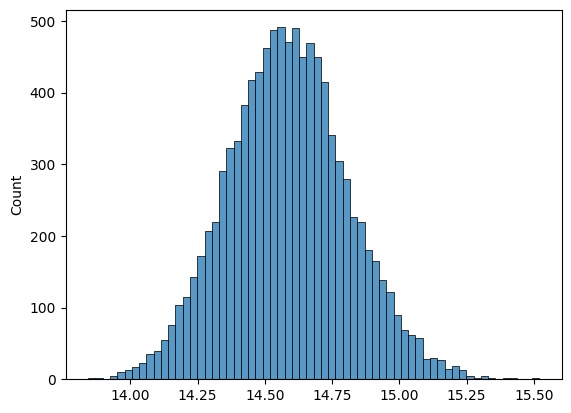

In [113]:
mean = []
for i in range(0,10000):
    temp = df['Actual_river_slope']
    sampler = np.random.randint(0, len(temp), 10000) # generate 2000 random integer numbers to be used as random indices
    sample = temp.take(sampler) # take 2000 random observations from temp
    mean.append(sample.mean())
sns.histplot(mean)

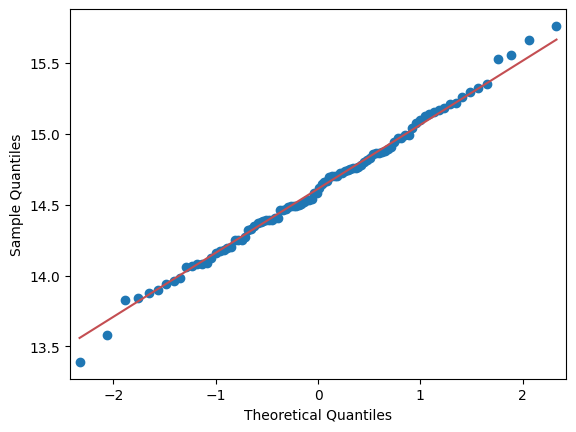

In [87]:
qqplot(pd.Series(mean), line='s')
plt.show()

In [88]:
# import function
from scipy.stats import shapiro

# normality test
stat, p = shapiro(mean)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.996, p=0.997
Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)
